In [1]:
import glob
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn import linear_model
import datetime
import dateutil.parser as parser
%matplotlib inline
plt.style.use('ggplot')

## Making DataFrames for each Country - includes both confirmed and suspected cases

In [32]:
# make Argentina dataframe
path = 'zika-master/Argentina/Surveillance_Bulletin/data'
cdcArg_paths = glob.glob(path + "/*.csv")

cdcArg = pd.DataFrame()
cdcArg_listofdfs = []

for path_ in cdcArg_paths:
    df = pd.read_csv(path_,index_col=None, header=0, 
                     usecols=['report_date','location','data_field','value'])
    cdcArg_listofdfs.append(df)
    
cdcArg = pd.concat(cdcArg_listofdfs)
cdcArg.report_date = pd.to_datetime(cdcArg['report_date'])
#cdcUSA['total_value'] = cdcUSA.groupby('report_date')['value'].transform(sum)
import os
cdcArg.to_csv(os.path.join('cdc-zika-data','cdcArg.csv'),index=False)

In [33]:
arg = pd.read_csv('cdc-zika-data/cdcArg.csv')
arg.head()

,report_date,location,data_field,value
0,2016-03-28,Argentina-Buenos_Aires,cumulative_confirmed_local_cases,0
1,2016-03-28,Argentina-CABA,cumulative_confirmed_local_cases,0
2,2016-03-28,Argentina-Cordoba,cumulative_confirmed_local_cases,1
3,2016-03-28,Argentina-Entre_Rios,cumulative_confirmed_local_cases,0
4,2016-03-28,Argentina-Santa_Fe,cumulative_confirmed_local_cases,0


In [34]:
# make Brazil dataframe
path = 'zika-master/Brazil/Epidemiological_Bulletin/data'
cdcBrazil_paths = glob.glob(path + "/*.csv")

cdcBrazil = pd.DataFrame()
cdcBrazil_listofdfs = []

for path_ in cdcBrazil_paths:
    df = pd.read_csv(path_,index_col=None, header=0, 
                     usecols=['report_date','location','data_field','value'])
    cdcBrazil_listofdfs.append(df)
    
cdcBrazil = pd.concat(cdcBrazil_listofdfs)
cdcBrazil.report_date = pd.to_datetime(cdcBrazil['report_date'])
#cdcUSA['total_value'] = cdcUSA.groupby('report_date')['value'].transform(sum)
import os
cdcBrazil.to_csv(os.path.join('cdc-zika-data','cdcBrazil.csv'),index=False)

In [35]:
brazil = pd.read_csv('cdc-zika-data/cdcBrazil.csv')
print brazil.head()
brazil.shape

  report_date         location     data_field  value
0  2016-04-02            Norte  zika_reported   6295
1  2016-04-02  Brazil-Rondonia  zika_reported    618
2  2016-04-02      Brazil-Acre  zika_reported    375
3  2016-04-02  Brazil-Amazonas  zika_reported   1520
4  2016-04-02   Brazil-Roraima  zika_reported     44


(264, 4)

In [37]:
# make Colombia Epidemiological dataframe
path = 'zika-master/Colombia/Epidemiological_Bulletin/data'
cdcColombia_E_paths = glob.glob(path + "/*.csv")

cdcColombia_E = pd.DataFrame()
cdcColombia_E_listofdfs = []

for path_ in cdcColombia_E_paths:
    df = pd.read_csv(path_,index_col=None, header=0, 
                     usecols=['report_date','location','data_field','value'])
    cdcColombia_E_listofdfs.append(df)
    
cdcColombia_E = pd.concat(cdcColombia_E_listofdfs)
cdcColombia_E.report_date = pd.to_datetime(cdcColombia_E['report_date'])
#cdcUSA['total_value'] = cdcUSA.groupby('report_date')['value'].transform(sum)
import os
cdcColombia_E.to_csv(os.path.join('cdc-zika-data','cdcColombia_E.csv'), index = False)

In [51]:
colombia = pd.read_csv('cdc-zika-data/cdcColombia_E.csv')
colombia

,report_date,location,data_field,value
0,2016-01-14,Colombia-Antioquia-Medellin,zika_confirmed_laboratory_pregnant,0
1,2016-01-14,Colombia-Antioquia-Barbosa,zika_confirmed_laboratory_pregnant,0
2,2016-01-14,Colombia-Antioquia-Unknown,zika_confirmed_laboratory_pregnant,1
3,2016-01-14,Colombia-Arauca-Arauca,zika_confirmed_laboratory_pregnant,1
4,2016-01-14,Colombia-Arauca-Fortul,zika_confirmed_laboratory_pregnant,0
5,2016-01-14,Colombia-Atlantico-Galapa,zika_confirmed_laboratory_pregnant,0
6,2016-01-14,Colombia-Atlantico-Sabanalarga,zika_confirmed_laboratory_pregnant,0
7,2016-01-14,Colombia-Atlantico-Soledad,zika_confirmed_laboratory_pregnant,0
8,2016-01-14,Colombia-Atlantico-Puerto_Colombia,zika_confirmed_laboratory_pregnant,0
9,2016-01-14,Colombia-Atlantico-Palmar_De_Varela,zika_confirmed_laboratory_pregnant,0


In [40]:
# make Colombia Municipality dataframe
path = 'zika-master/Colombia/Municipality_Zika/data'
cdcColombia_M_paths = glob.glob(path + "/*.csv")

cdcColombia_M = pd.DataFrame()
cdcColombia_M_listofdfs = []

for path_ in cdcColombia_M_paths:
    df = pd.read_csv(path_,index_col=None, header=0, 
                     usecols=['report_date','location','data_field','value'])
    cdcColombia_M_listofdfs.append(df)
    
cdcColombia_M = pd.concat(cdcColombia_M_listofdfs)
cdcColombia_M.report_date = pd.to_datetime(cdcColombia_M['report_date'])
#cdcUSA['total_value'] = cdcUSA.groupby('report_date')['value'].transform(sum)
import os
cdcColombia_M.to_csv(os.path.join('cdc-zika-data','cdcColombia_M.csv'), index = False)

In [70]:
colombia_m = pd.read_csv('cdc-zika-data/cdcColombia_M.csv')
colombia_m[colombia_m.location=='Colombia-Huila']


,report_date,location,data_field,value


In [71]:
colombia[colombia.location=='Colombia-Huila']

,report_date,location,data_field,value
686,2016-03-31,Colombia-Huila,zika_confirmed_laboratory_pregnant,168
723,2016-03-31,Colombia-Huila,zika_suspected_clinic_pregnant,791
760,2016-03-31,Colombia-Huila,zika_suspected_pregnant,83
801,2016-03-31,Colombia-Huila,neurological_syndrome_zika_positive,21
830,2016-04-07,Colombia-Huila,zika_confirmed_laboratory_pregnant,208
867,2016-04-07,Colombia-Huila,zika_suspected_clinic_pregnant,775
904,2016-04-07,Colombia-Huila,zika_suspected_pregnant,60
945,2016-04-07,Colombia-Huila,neurological_syndrome_zika_positive,21
975,2016-04-14,Colombia-Huila,zika_confirmed_laboratory_pregnant,253
1012,2016-04-14,Colombia-Huila,zika_suspected_clinic_pregnant,794


In [72]:
frames = [colombia, colombia_m]
colombia_combined = pd.concat(frames)
colombia_combined[colombia_combined.report_date == '2016-01-09']

,report_date,location,data_field,value
0,2016-01-09,Colombia-Antioquia-Unknown,zika_confirmed_laboratory,1.0
1,2016-01-09,Colombia-Antioquia-Medellin,zika_confirmed_laboratory,36.0
2,2016-01-09,Colombia-Antioquia-Abejorral,zika_confirmed_laboratory,0.0
3,2016-01-09,Colombia-Antioquia-Abriaqui,zika_confirmed_laboratory,0.0
4,2016-01-09,Colombia-Antioquia-Alejandria,zika_confirmed_laboratory,0.0
5,2016-01-09,Colombia-Antioquia-Amaga,zika_confirmed_laboratory,0.0
6,2016-01-09,Colombia-Antioquia-Amalfi,zika_confirmed_laboratory,0.0
7,2016-01-09,Colombia-Antioquia-Andes,zika_confirmed_laboratory,0.0
8,2016-01-09,Colombia-Antioquia-Angelopolis,zika_confirmed_laboratory,0.0
9,2016-01-09,Colombia-Antioquia-Angostura,zika_confirmed_laboratory,0.0


In [81]:
colombia_comb=colombia_combined.sort_values(by='report_date')
colombia_comb.index = range(0,len(colombia_comb))
colombia_comb.head(n=14)

,report_date,location,data_field,value
0,2016-01-09,Colombia-Norte_Santander-Teorama,zika_confirmed_clinic,0.0
1,2016-01-09,Colombia-Bolivar-Talaigua_Nuevo,zika_suspected,0.0
2,2016-01-09,Colombia-Bolivar-Soplaviento,zika_suspected,1.0
3,2016-01-09,Colombia-Bolivar-Simiti,zika_suspected,0.0
4,2016-01-09,Colombia-Bolivar-Santa_Rosa_Del_Sur,zika_suspected,0.0
5,2016-01-09,Colombia-Bolivar-Santa_Rosa,zika_suspected,0.0
6,2016-01-09,Colombia-Bolivar-Santa_Catalina,zika_suspected,0.0
7,2016-01-09,Colombia-Bolivar-San_Pablo,zika_suspected,0.0
8,2016-01-09,Colombia-Bolivar-San_Martin_De_Loba,zika_suspected,0.0
9,2016-01-09,Colombia-Bolivar-San_Juan_Nepomuceno,zika_suspected,0.0


In [82]:
import os
colombia_comb.to_csv(os.path.join('cdc-zika-data','cdcColombia.csv'), index = False)

In [192]:
colombia = pd.read_csv('cdc-zika-data/cdcColombia.csv')
colombia.head()

,report_date,location,data_field,value
0,2016-01-09,Colombia-Norte_Santander-Teorama,zika_confirmed_clinic,0.0
1,2016-01-09,Colombia-Bolivar-Talaigua_Nuevo,zika_suspected,0.0
2,2016-01-09,Colombia-Bolivar-Soplaviento,zika_suspected,1.0
3,2016-01-09,Colombia-Bolivar-Simiti,zika_suspected,0.0
4,2016-01-09,Colombia-Bolivar-Santa_Rosa_Del_Sur,zika_suspected,0.0


In [83]:
# make DR dataframe
path = 'zika-master/Dominican_Republic/Epidemiological_Bulletin/data'
cdcDR_paths = glob.glob(path + "/*.csv")

cdcDR = pd.DataFrame()
cdcDR_listofdfs = []

for path_ in cdcDR_paths:
    df = pd.read_csv(path_,index_col=None, header=0, 
                     usecols=['report_date','location','data_field','value'])
    cdcDR_listofdfs.append(df)
    
cdcDR = pd.concat(cdcDR_listofdfs)
cdcDR.report_date = pd.to_datetime(cdcDR['report_date'])
#cdcUSA['total_value'] = cdcUSA.groupby('report_date')['value'].transform(sum)
import os
cdcDR.to_csv(os.path.join('cdc-zika-data','cdcDR.csv'), index = False)

In [86]:
dr = pd.read_csv('cdc-zika-data/cdcDR.csv')
dr.head()

,report_date,location,data_field,value
0,2016-01-09,Dominican_Republic,total_zika_new_suspected,0.0
1,2016-01-16,Dominican_Republic,total_zika_new_suspected,0.0
2,2016-01-23,Dominican_Republic,total_zika_new_suspected,27.0
3,2016-01-23,Dominican_Republic,total_zika_new_confirmed_pcr,10.0
4,2016-01-30,Dominican_Republic,total_zika_new_suspected,32.0


In [87]:
# make Ecuador dataframe
path = 'zika-master/Ecuador/GACETA-ZIKA/data'
cdcEcuador_paths = glob.glob(path + "/*.csv")

cdcEcuador = pd.DataFrame()
cdcEcuador_listofdfs = []

for path_ in cdcEcuador_paths:
    df = pd.read_csv(path_,index_col=None, header=0, 
                     usecols=['report_date','location','data_field','value'])
    cdcEcuador_listofdfs.append(df)
    
cdcEcuador = pd.concat(cdcEcuador_listofdfs)
cdcEcuador.report_date = pd.to_datetime(cdcEcuador['report_date'])
#cdcUSA['total_value'] = cdcUSA.groupby('report_date')['value'].transform(sum)
import os
cdcEcuador.to_csv(os.path.join('cdc-zika-data','cdcEcuador.csv'), index = False)

In [88]:
ecuador = pd.read_csv('cdc-zika-data/cdcEcuador.csv')
ecuador.head()

,report_date,location,data_field,value
0,2016-03-30,Ecuador,total_zika_suspected_cumulative,76
1,2016-03-30,Ecuador-Sucumbios,total_zika_suspected_cumulative,1
2,2016-03-30,Ecuador-Santo_Domingo_de_los_Tsachilas,total_zika_suspected_cumulative,1
3,2016-03-30,Ecuador-Santa_Elena,total_zika_suspected_cumulative,8
4,2016-03-30,Ecuador-Pichincha,total_zika_suspected_cumulative,19


In [89]:
# make El Salvador dataframe
path = 'zika-master/El_Salvador/Epidemiological_Bulletin/data'
cdcEl_Salvador_paths = glob.glob(path + "/*.csv")

cdcEl_Salvador = pd.DataFrame()
cdcEl_Salvador_listofdfs = []

for path_ in cdcEl_Salvador_paths:
    df = pd.read_csv(path_,index_col=None, header=0, 
                     usecols=['report_date','location','data_field','value'])
    cdcEl_Salvador_listofdfs.append(df)
    
cdcEl_Salvador = pd.concat(cdcEl_Salvador_listofdfs)
cdcEl_Salvador.report_date = pd.to_datetime(cdcEl_Salvador['report_date'])
#cdcUSA['total_value'] = cdcUSA.groupby('report_date')['value'].transform(sum)
import os
cdcEl_Salvador.to_csv(os.path.join('cdc-zika-data','cdcEl_Salvador.csv'), index = False)

In [90]:
el_sal = pd.read_csv('cdc-zika-data/cdcEl_Salvador.csv')
el_sal.head()

,report_date,location,data_field,value
0,2015-11-28,El_Salvador-Ahuachapan,cumulative_suspected_total,4.0
1,2015-11-28,El_Salvador-Cabanas,cumulative_suspected_total,3.0
2,2015-11-28,El_Salvador-Chalatenango,cumulative_suspected_total,8.0
3,2015-11-28,El_Salvador-Cuscatlan,cumulative_suspected_total,4.0
4,2015-11-28,El_Salvador-La_Libertad,cumulative_suspected_total,61.0


In [91]:
# make Guatemala dataframe
path = 'zika-master/Guatemala/SEMEPI/data'
cdcGuatemala_paths = glob.glob(path + "/*.csv")

cdcGuatemala = pd.DataFrame()
cdcGuatemala_listofdfs = []

for path_ in cdcGuatemala_paths:
    df = pd.read_csv(path_,index_col=None, header=0, 
                     usecols=['report_date','location','data_field','value'])
    cdcGuatemala_listofdfs.append(df)
    
cdcGuatemala = pd.concat(cdcGuatemala_listofdfs)
cdcGuatemala.report_date = pd.to_datetime(cdcGuatemala['report_date'])
#cdcUSA['total_value'] = cdcUSA.groupby('report_date')['value'].transform(sum)
import os
cdcGuatemala.to_csv(os.path.join('cdc-zika-data','cdcGuatemala.csv'), index = False)

In [92]:
guat= pd.read_csv('cdc-zika-data/cdcGuatemala.csv')
guat.head()

,report_date,location,data_field,value
0,2016-01-19,Guatemala,total_zika_suspected,25.0
1,2016-01-19,Guatemala-Zacapa,total_zika_suspected,11.0
2,2016-01-19,Guatemala-Suchitepequez,total_zika_suspected,9.0
3,2016-01-19,Guatemala-Izabal,total_zika_suspected,2.0
4,2016-01-19,Guatemala-Peten_Sur_Oriental,total_zika_suspected,1.0


In [94]:
# make Haiti dataframe
path = 'zika-master/Haiti/Evolution-Epidimie-du-ZIKA/data'
cdcHaiti_paths = glob.glob(path + "/*.csv")

cdcHaiti = pd.DataFrame()
cdcHaiti_listofdfs = []

for path_ in cdcHaiti_paths:
    df = pd.read_csv(path_,index_col=None, header=0, 
                     usecols=['report_date','location','data_field','value'])
    cdcHaiti_listofdfs.append(df)
    
cdcHaiti = pd.concat(cdcHaiti_listofdfs)
cdcHaiti.report_date = pd.to_datetime(cdcHaiti['report_date'])
#cdcUSA['total_value'] = cdcUSA.groupby('report_date')['value'].transform(sum)
import os
cdcHaiti.to_csv(os.path.join('cdc-zika-data','cdcHaiti.csv'), index = False)

In [95]:
haiti= pd.read_csv('cdc-zika-data/cdcHaiti.csv')
haiti.head()

,report_date,location,data_field,value
0,2016-02-03,Haiti-Artibonite-Desssalines_Marchand,total_zika_new_suspected,1
1,2016-02-03,Haiti-Artibonite-Ennery,total_zika_new_suspected,7
2,2016-02-03,Haiti-Artibonite-Gonaives,total_zika_new_suspected,3
3,2016-02-03,Haiti-Artibonite-Verrettes,total_zika_new_suspected,42
4,2016-02-03,Haiti-Artibonite,total_zika_new_suspected,53


In [96]:
# make Mexico dataframe
path = 'zika-master/Mexico/DGE_Zika/data'
cdcMexico_paths = glob.glob(path + "/*.csv")

cdcMexico = pd.DataFrame()
cdcMexico_listofdfs = []

for path_ in cdcMexico_paths:
    df = pd.read_csv(path_,index_col=None, header=0, 
                     usecols=['report_date','location','data_field','value'])
    cdcMexico_listofdfs.append(df)
    
cdcMexico = pd.concat(cdcMexico_listofdfs)
cdcMexico.report_date = pd.to_datetime(cdcMexico['report_date'])
#cdcUSA['total_value'] = cdcUSA.groupby('report_date')['value'].transform(sum)
import os
cdcMexico.to_csv(os.path.join('cdc-zika-data','cdcMexico.csv'), index = False)

In [97]:
mexico = pd.read_csv('cdc-zika-data/cdcMexico.csv')
mexico.head()

,report_date,location,data_field,value
0,2015-11-28,Mexico-Aguascalientes,weekly_zika_confirmed,0
1,2015-11-28,Mexico-Baja_California,weekly_zika_confirmed,0
2,2015-11-28,Mexico-Baja_California_Sur,weekly_zika_confirmed,0
3,2015-11-28,Mexico-Campeche,weekly_zika_confirmed,0
4,2015-11-28,Mexico-Chiapas,weekly_zika_confirmed,1


In [98]:
# make Nicaragua dataframe
path = 'zika-master/Nicaragua/MINSA_ZIKA_Search/data'
cdcNicaragua_paths = glob.glob(path + "/*.csv")

cdcNicaragua = pd.DataFrame()
cdcNicaragua_listofdfs = []

for path_ in cdcNicaragua_paths:
    df = pd.read_csv(path_,index_col=None, header=0, 
                     usecols=['report_date','location','data_field','value'])
    cdcNicaragua_listofdfs.append(df)
    
cdcNicaragua = pd.concat(cdcNicaragua_listofdfs)
cdcNicaragua.report_date = pd.to_datetime(cdcNicaragua['report_date'])
#cdcUSA['total_value'] = cdcUSA.groupby('report_date')['value'].transform(sum)
import os
cdcNicaragua.to_csv(os.path.join('cdc-zika-data','cdcNicaragua.csv'), index = False)

In [99]:
nicaragua = pd.read_csv('cdc-zika-data/cdcNicaragua.csv')
nicaragua.head()

,report_date,location,data_field,value
0,2016-02-09,Nicaragua,total_zika_new_suspected,5
1,2016-02-09,Nicaragua,total_zika_confirmed,3
2,2016-02-09,Nicaragua-Nueva_Segovia-Ocotal,total_zika_confirmed,1
3,2016-02-09,Nicaragua-Managua-Distrito_II,total_zika_confirmed,2
4,2016-02-09,Nicaragua,total_zika_confirmed_cumulative,41


In [103]:
# make Panama dataframe
path = 'zika-master/Panama/MDS_Zika/data'
cdcPanama_paths = glob.glob(path + "/*.csv")

cdcPanama = pd.DataFrame()
cdcPanama_listofdfs = []

for path_ in cdcPanama_paths:
    df = pd.read_csv(path_,index_col=None, header=0, 
                     usecols=['report_date','location','data_field','value'])
    cdcPanama_listofdfs.append(df)
    
cdcPanama = pd.concat(cdcPanama_listofdfs)
cdcPanama.report_date = pd.to_datetime(cdcPanama['report_date'])
#cdcUSA['total_value'] = cdcUSA.groupby('report_date')['value'].transform(sum)
import os
cdcPanama.to_csv(os.path.join('cdc-zika-data','cdcPanama.csv'), index = False)

In [104]:
panama = pd.read_csv('cdc-zika-data/cdcPanama.csv')
panama.head()

,report_date,location,data_field,value
0,2016-01-06,Panama-Kuna_Yala-Mulatupu,Zika_confirmed_laboratory_2016,2.0
1,2016-01-06,Panama-Kuna_Yala-Ustupu,Zika_confirmed_laboratory_2016,14.0
2,2016-01-06,Panama-Kuna_Yala-Ogobsucum,Zika_confirmed_laboratory_2016,7.0
3,2016-01-06,Panama-Kuna_Yala-Achutupu,Zika_confirmed_laboratory_2016,7.0
4,2016-01-06,Panama-Kuna_Yala-Playon_Chico,Zika_confirmed_laboratory_2016,2.0


### Focusing only on the greatest number of cases between confirmed and suspected

### For Panama

In [125]:
panama.ix[(panama.data_field == "Zika_confirmed_M") | (panama.data_field == "Zika_confirmed_F")].value.sum()

7178.0

In [126]:
panama.data_field.unique()

array(['Zika_confirmed_laboratory_2016', 'Zika_confirmed_F',
       'Zika_confirmed_M', 'confirmed_age_under_1', 'confirmed_age_1-4',
       'confirmed_age_5-9', 'confirmed_age_10-14', 'confirmed_age_15-19',
       'confirmed_age_20-24', 'confirmed_age_25-34', 'confirmed_age_35-49',
       'confirmed_age_50-59', 'confirmed_age_60-64',
       'confirmed_age_65_plus', 'Zika_confirmed_laboratory_2015',
       'confirmed_age_under_5', 'confirmed_age_10-19',
       'confirmed_age_20-29', 'confirmed_age_30-39', 'confirmed_age_40-49',
       'confirmed_age_60_plus', 'weekly_Zika_confirmed_local',
       'weekly_Zika_confirmed_imported',
       'weekly_Zika_confirmed_asymptomatic',
       'weekly_Zika_confirmed_pending', 'Zika_positive_pregnant',
       'Zika_negative_pregnant'], dtype=object)

In [129]:
panama.ix[(panama.data_field == "confirmed_age_under_1") | (panama.data_field == "confirmed_age_1-4")|
         (panama.data_field == "confirmed_age_5-9")|(panama.data_field == "confirmed_age_10-14")|
         (panama.data_field == "confirmed_age_15-19")|(panama.data_field == "confirmed_age_20-24")|
         (panama.data_field == "confirmed_age_25-34")|(panama.data_field == "confirmed_age_35-49")|
         (panama.data_field == "confirmed_age_50-59")|(panama.data_field == "confirmed_age_60-64")|
         (panama.data_field == "confirmed_age_65_plus")|(panama.data_field == "confirmed_age_under_5") | (panama.data_field == "confirmed_age_10-19")|
         (panama.data_field == "confirmed_age_20-29")|(panama.data_field == "confirmed_age_30-39")|
         (panama.data_field == "confirmed_age_40-49")|(panama.data_field == "confirmed_age_60_plus")].value.sum()

7113.0

In [132]:
panama_zika_count = panama.ix[(panama.data_field == "Zika_confirmed_laboratory_2016") | (panama.data_field == "Zika_confirmed_laboratory_2015")].value.sum()
print "Total number of Zika Counts in Panama:", panama_zika_count

Total number of Zika Counts in Panama: 13082.0


### For Nicaragua

In [133]:
nicaragua.data_field.unique()

array(['total_zika_new_suspected', 'total_zika_confirmed',
       'total_zika_confirmed_cumulative',
       'total_zika_confirmed_pregnant_cumulative',
       'total_zika_confirmed_pregnant', 'normal_birth_confirmed_zika',
       'normal_birth_confirmed_cumulative'], dtype=object)

In [164]:
nicaragua.ix[(nicaragua.data_field == 'total_zika_new_suspected' )].value.sum()

390

In [142]:
nicaragua_zika_count = nicaragua.ix[(nicaragua.data_field == 'total_zika_confirmed_cumulative' )].value.sum()
print "Total number of Zika Counts in Nicaragua:", nicaragua_zika_count

Total number of Zika Counts in Nicaragua: 22423


### For Mexico

In [143]:
mexico.data_field.unique()

array(['weekly_zika_confirmed', 'yearly_cumulative_female',
       'yearly_cumulative_male'], dtype=object)

In [155]:
mexico_zika_count = mexico.ix[(mexico.data_field == 'yearly_cumulative_female' )|(mexico.data_field == 'yearly_cumulative_male' )].value.sum()
print "Total number of Zika Counts in Mexico:", mexico_zika_count

Total number of Zika Counts in Mexico: 106938


### For Haiti

In [157]:
haiti.data_field.unique()

array(['total_zika_new_suspected', 'total_zika_new_suspected_cumulative'], dtype=object)

In [158]:
haiti_zika_count = haiti.ix[(haiti.data_field == 'total_zika_new_suspected_cumulative' )].value.sum()
print "Total number of Zika Counts in Haiti:", haiti_zika_count

Total number of Zika Counts in Haiti: 658


### For Guatemala

In [159]:
guat.data_field.unique()

array(['total_zika_suspected', 'total_zika_suspected_cumulative',
       'total_zika_confirmed_cumulative',
       'total_zika_confirmed_pregnant_cumulative',
       'total_zika_suspected_F', 'total_zika_suspected_M',
       'total_zika_confirmed', 'total_zika_confirmed_F',
       'total_zika_confirmed_M',
       'total_zika_suspected_pregnant_cumulative', 'normal_birth_M',
       'normal_birth_F', 'normal_birth', 'microcephaly_birth',
       'neurological_syndrome'], dtype=object)

In [160]:
guat.ix[(guat.data_field == 'total_zika_confirmed_cumulative' )].value.sum()

9255.0

In [161]:
guat.ix[(guat.data_field == 'total_zika_confirmed_M' )|(guat.data_field == 'total_zika_confirmed_F' )].value.sum()

58.0

In [162]:
guat.ix[(guat.data_field == 'total_zika_confirmed' )].value.sum()

1426.0

In [167]:
guat.ix[(guat.data_field == 'total_zika_suspected_cumulative' )].value.sum()

127283.0

In [169]:
guat_zika_count = guat.ix[(guat.data_field == 'total_zika_suspected_cumulative' )].value.sum()
print "Total number of Zika Counts in Guatemala:", guat_zika_count

Total number of Zika Counts in Guatemala: 127283.0


### For El Salvador 

In [170]:
el_sal.data_field.unique()

array(['cumulative_suspected_total', 'cumulative_suspected_pregnant',
       'cumulative_suspected_age_under_1', 'cumulative_suspected_age_1-4',
       'cumulative_suspected_age_5-9', 'cumulative_suspected_age_10-19',
       'cumulative_suspected_age_20-29', 'cumulative_suspected_age_30-39',
       'cumulative_suspected_age_40-49', 'cumulative_suspected_age_50-59',
       'cumulative_suspected_age_60_plus', 'weekly_hospitalized',
       'cumulative_confirmed'], dtype=object)

In [174]:
el_sal.ix[(el_sal.data_field == 'cumulative_suspected_age_under_1' )| (el_sal.data_field == 'cumulative_suspected_age_1-4')
         |(el_sal.data_field == 'cumulative_suspected_age_5-9') | (el_sal.data_field == 'cumulative_suspected_age_10-19') 
         |(el_sal.data_field == 'cumulative_suspected_age_20-29')|(el_sal.data_field == 'cumulative_suspected_age_30-39')
         |(el_sal.data_field == 'cumulative_suspected_age_40-49')|(el_sal.data_field == 'cumulative_suspected_age_50-59')
         |(el_sal.data_field == 'cumulative_suspected_age_60_plus')| (el_sal.data_field == 'cumulative_suspected_pregnant')].value.sum()

338353.0

In [172]:
el_sal.ix[(el_sal.data_field == 'cumulative_suspected_total' )].value.sum()

642933.0

In [173]:
el_sal.ix[(el_sal.data_field == 'cumulative_confirmed' )].value.sum()

1860.0

In [176]:
el_sal_zika_count = el_sal.ix[(el_sal.data_field == 'cumulative_suspected_total' )].value.sum()
print "Total number of Zika Counts in El Salvador:", el_sal_zika_count

 Total number of Zika Counts in El Salvador: 642933.0


### For Ecuador

In [178]:
ecuador.data_field.unique()

array(['total_zika_suspected_cumulative',
       'total_zika_confirmed_cumulative',
       'total_zika_confirmed_autochthonous',
       'total_zika_confirmed_imported', 'total_zika_confirmed_pregnant',
       'total_zika_confirmed_ages_0-11mo_F',
       'total_zika_confirmed_ages_0-11mo_M',
       'total_zika_confirmed_ages_1-4yrs_F',
       'total_zika_confirmed_ages_1-4yrs_M',
       'total_zika_confirmed_ages_5-9yrs_F',
       'total_zika_confirmed_ages_5-9yrs_M',
       'total_zika_confirmed_ages_10-14yrs_F',
       'total_zika_confirmed_ages_10-14yrs_M',
       'total_zika_confirmed_ages_15-19yrs_F',
       'total_zika_confirmed_ages_15-19yrs_M',
       'total_zika_confirmed_ages_20-49yrs_F',
       'total_zika_confirmed_ages_20-49yrs_M',
       'total_zika_confirmed_ages_50-64yrs_F',
       'total_zika_confirmed_ages_50-64yrs_M',
       'total_zika_confirmed_ages_over65_F',
       'total_zika_confirmed_ages_over65_M',
       'total_zika_confirmed_Not-Aplicable'], dtype=object)

In [183]:
ecuador_zika_count = ecuador.ix[(ecuador.data_field == 'total_zika_confirmed_ages_0-11mo_F' )| (ecuador.data_field == 'total_zika_confirmed_ages_0-11mo_M')
         |(ecuador.data_field == 'total_zika_confirmed_ages_1-4yrs_F') | (ecuador.data_field == 'total_zika_confirmed_ages_1-4yrs_M') 
         |(ecuador.data_field == 'total_zika_confirmed_ages_5-9yrs_F')|(ecuador.data_field == 'total_zika_confirmed_ages_5-9yrs_M')
         |(ecuador.data_field == 'total_zika_confirmed_ages_10-14yrs_F')|(ecuador.data_field == 'total_zika_confirmed_ages_10-14yrs_M')
         |(ecuador.data_field == 'total_zika_confirmed_ages_15-19yrs_F')| (ecuador.data_field == 'total_zika_confirmed_ages_15-19yrs_M')
          |(ecuador.data_field == 'total_zika_confirmed_ages_20-49yrs_F')|(ecuador.data_field=='total_zika_confirmed_ages_20-49yrs_M')
          |(ecuador.data_field == 'total_zika_confirmed_ages_50-64yrs_F')|(ecuador.data_field == 'total_zika_confirmed_ages_50-64yrs_M')
          |(ecuador.data_field == 'total_zika_confirmed_ages_over65_F')|(ecuador.data_field == 'total_zika_confirmed_ages_over65_M' )].value.sum()
print "Total number of Zika Counts in Ecuador:", ecuador_zika_count

Total number of Zika Counts in Ecuador: 46447


In [181]:
ecuador.ix[(ecuador.data_field == 'total_zika_suspected_cumulative')].value.sum()

3796

In [182]:
ecuador.ix[(ecuador.data_field == 'total_zika_confirmed_cumulative')].value.sum()

46145

### For DR 

In [185]:
dr.data_field.unique()

array(['total_zika_new_suspected', 'total_zika_new_confirmed_pcr',
       'zika_new_confirmed_pcr_f', 'zika_new_confirmed_pcr_m',
       'efe_reported', 'zika_suspected_cumulative',
       'zika_suspected_pregnant_cumulative',
       'zika_confirmed_pcr_cumulative', 'zika_suspected_pregnant',
       'gbs_reported', 'gbs_zika_confirmed', 'gbs_zika_confirmed_pregnant',
       'gbs_confirmed_cumulative', 'gbs_reported_cumulative',
       'microcephaly_confirmed_cumulative', 'microcephaly_suspected',
       'microcephaly_suspected_cumulative',
       'zika_confirmed_pregnant_cumulative', 'zika_suspected_4weeks',
       'gbs_reported_4weeks', 'microcephaly_suspected_4weeks',
       'microcephaly_confirmed', 'microcephaly_confirmed_4weeks'], dtype=object)

In [189]:
dr_zika_count = dr.ix[(dr.data_field == 'zika_suspected_cumulative')].value.sum()
print "Total number of Zika Counts in Ecuador:", dr_zika_count

 Total number of Zika Counts in Ecuador: 339783.0


In [187]:
dr.ix[(dr.data_field == 'zika_suspected_pregnant_cumulative')].value.sum()

55521.0

### For Colombia

In [194]:
colombia.data_field.unique()

array(['zika_confirmed_clinic', 'zika_suspected',
       'zika_confirmed_laboratory', 'zika_confirmed_laboratory_pregnant',
       'zika_confirmed_clinic_pregnant', 'zika_suspected_pregnant',
       'zika_suspected_clinic', 'neurological_syndrome_zika_positive',
       'zika_suspected_clinic_pregnant'], dtype=object)

In [195]:
colombia.ix[(colombia.data_field == 'zika_confirmed_laboratory')|(colombia.data_field == 'zika_confirmed_clinic')].value.sum()

517752.0

In [199]:
colombia_zika_count = colombia.ix[(colombia.data_field == 'zika_suspected_clinic')].value.sum()
print "Total number of Zika Counts in Colombia:", colombia_zika_count

Total number of Zika Counts in Colombia: 2479670.0


### For Brazil

In [202]:
brazil.data_field.unique()

array(['zika_reported'], dtype=object)

In [204]:
brazil_zika_count = brazil.value.sum()
print "Total number of Zika Counts in Brazil:", brazil_zika_count

Total number of Zika Counts in Brazil: 3274992


### For Argentina

In [206]:
arg.data_field.unique()

array(['cumulative_confirmed_local_cases',
       'cumulative_probable_local_cases',
       'cumulative_confirmed_imported_cases',
       'cumulative_probable_imported_cases',
       'cumulative_cases_under_study',
       'cumulative_confirmed_zika_pregnant',
       'cumulative_possible_zika_pregnant',
       'cumulative_congenital_syndrome_zika'], dtype=object)

In [213]:
arg_zika_count = arg.ix[(arg.data_field == 'cumulative_confirmed_local_cases')|(arg.data_field == 'cumulative_confirmed_imported_cases')].value.sum()
print "Total number of Zika Counts in Argentina:", arg_zika_count

Total number of Zika Counts in Argentina: 1068


In [212]:
arg.ix[(arg.data_field == 'cumulative_probable_local_cases')|(arg.data_field == 'cumulative_probable_imported_cases')].value.sum()

262

### Making Dataframe with all outside countries and zika counts

In [214]:
df = {'Argentina':arg_zika_count,'Brazil':brazil_zika_count,'Colombia': colombia_zika_count,'Dominican Republic':dr_zika_count,
      'Ecuador':ecuador_zika_count,'El Salvador': el_sal_zika_count,'Guatemala': guat_zika_count, 'Haiti':haiti_zika_count,
     'Mexico': mexico_zika_count, 'Nicaragua': nicaragua_zika_count, 'Panama': panama_zika_count}

In [215]:
df = {'countries':pd.Series(['Argentina','Brazil','Colombia','Dominican Republic','Ecuador','El Salvador','Guatemala','Haiti','Mexico','Nicaragua','Panama']),
     'zika_count': pd.Series([arg_zika_count,brazil_zika_count,colombia_zika_count,dr_zika_count,ecuador_zika_count,el_sal_zika_count,guat_zika_count,haiti_zika_count,mexico_zika_count,nicaragua_zika_count,panama_zika_count])}

In [219]:
df_made = pd.DataFrame(df)
df_made_new=df_made.set_index(df_made.countries)
df_made_new

,countries,zika_count
countries,,
Argentina,Argentina,1068.0
Brazil,Brazil,3274992.0
Colombia,Colombia,2479670.0
Dominican Republic,Dominican Republic,339783.0
Ecuador,Ecuador,46447.0
El Salvador,El Salvador,642933.0
Guatemala,Guatemala,127283.0
Haiti,Haiti,658.0
Mexico,Mexico,106938.0


In [224]:
import os
df_made_new.to_csv(os.path.join('cdc-zika-data','Countsby_country.csv'), index = False)

# Visualizations

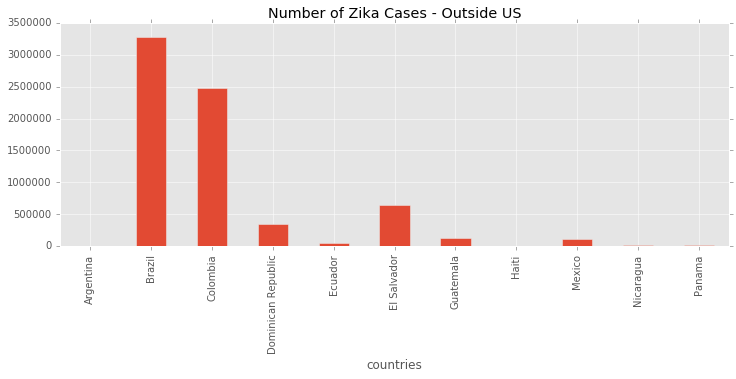

In [220]:
df_made_new.zika_count.plot.bar(title = 'Number of Zika Cases - Outside US',figsize=(12,4), grid=True)

In [25]:
usa = pd.read_csv('cdcUSA.csv')
usa.drop(usa.columns[[0]], axis = 1,inplace = True)
usa.head()

,report_date,location,data_field,value,cum_val,cum_val_travel,cum_val_local
0,2016-02-24,United_States-Alabama,zika_reported_travel,1.0,1.0,1.0,0.0
1,2016-02-24,United_States-Alabama,zika_reported_local,0.0,0.0,0.0,0.0
2,2016-02-24,United_States-American_Samoa,zika_reported_local,4.0,4.0,0.0,4.0
3,2016-02-24,United_States-American_Samoa,zika_reported_travel,0.0,1.0,1.0,0.0
4,2016-02-24,United_States-Arkansas,zika_reported_travel,1.0,2.0,2.0,0.0


In [31]:
usa_travel = usa.ix[usa.data_field == 'zika_reported_travel']
usa_travel

,report_date,location,data_field,value,cum_val,cum_val_travel,cum_val_local
0,2016-02-24,United_States-Alabama,zika_reported_travel,1.0,1.0,1.0,0.0
3,2016-02-24,United_States-American_Samoa,zika_reported_travel,0.0,1.0,1.0,0.0
4,2016-02-24,United_States-Arkansas,zika_reported_travel,1.0,2.0,2.0,0.0
7,2016-02-24,United_States-California,zika_reported_travel,6.0,8.0,8.0,0.0
9,2016-02-24,United_States-Delaware,zika_reported_travel,1.0,9.0,9.0,0.0
11,2016-02-24,United_States-District_of_Columbia,zika_reported_travel,3.0,12.0,12.0,0.0
12,2016-02-24,United_States-Florida,zika_reported_travel,28.0,40.0,40.0,0.0
15,2016-02-24,United_States-Georgia,zika_reported_travel,1.0,41.0,41.0,0.0
17,2016-02-24,United_States-Hawaii,zika_reported_travel,4.0,45.0,45.0,0.0
19,2016-02-24,United_States-Illinois,zika_reported_travel,4.0,49.0,49.0,0.0


In [36]:
states = usa_travel.location.unique()
counts = []
for state in states: 
    df = usa_travel.groupby(['location']).get_group(state)
    counts.append(df.cum_val_travel.sum())
    
print counts

[42199.0, 43037.0, 43105.0, 43658.0, 43769.0, 43837.0, 28566.0, 45190.0, 45309.0, 45517.0, 45620.0, 45702.0, 45854.0, 46120.0, 46326.0, 46623.0, 46747.0, 47002.0, 48652.0, 48998.0, 49161.0, 37370.0, 45133.0, 49554.0, 50091.0, 50106.0, 50360.0, 50407.0, 43696.0, 46336.0, 46637.0, 46653.0, 46777.0, 48737.0, 48978.0, 45474.0, 45538.0, 50081.0, 43266.0, 34292.0, 36431.0, 37002.0, 37113.0, 39549.0, 33180.0, 12057.0, 19462.0, 19470.0, 19633.0, 19753.0]


In [37]:
df = {'states':pd.Series(states),
     'zika_count': pd.Series(counts)}

In [41]:
df_made = pd.DataFrame(df)
import os
df_made.to_csv(os.path.join('cdc-zika-data','Countsby_state.csv'), index = False)